## *Simple Linear Regression*

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [95]:
data=pd.read_csv("C:/Users/Nisha Malviya/Desktop/Nisha/Datasets/height-weight.csv")

In [96]:
data

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0.5, 1.0, 'Relationship betwwen Weight and height')

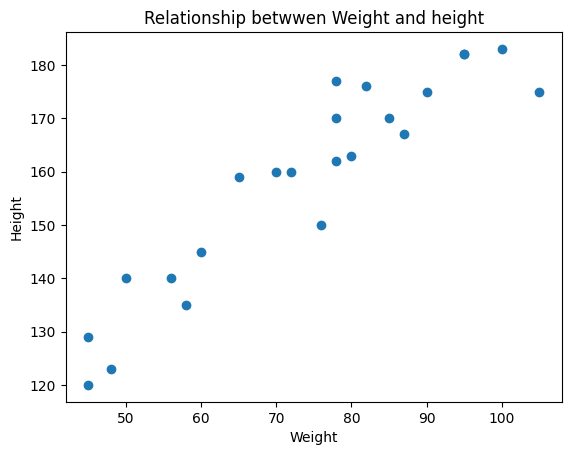

In [97]:
plt.scatter(data['Weight'],data['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Relationship betwwen Weight and height")

Each point on the graph represents a pair of values: one for weight and the other for height. The distribution of these points suggests a positive correlation, meaning that generally, as weight increases, height also increases.

In [98]:
data.shape


(23, 2)

In [99]:
#checking missing values
data.isna().sum()

Weight    0
Height    0
dtype: int64

As per observation,there is no missing values.

In [100]:
#checking duplicates
data.duplicated().sum()

1

In [101]:
data[data.duplicated()]

,Weight,Height
11,95,182


In [102]:
#droping duplicates
data=data.drop_duplicates()

As per observation,we determine that there is one duplicate row,so we deleted the duplicate row by using drop_duplicates.

In [103]:
data.shape

(22, 2)

<Axes: xlabel='Height', ylabel='Count'>

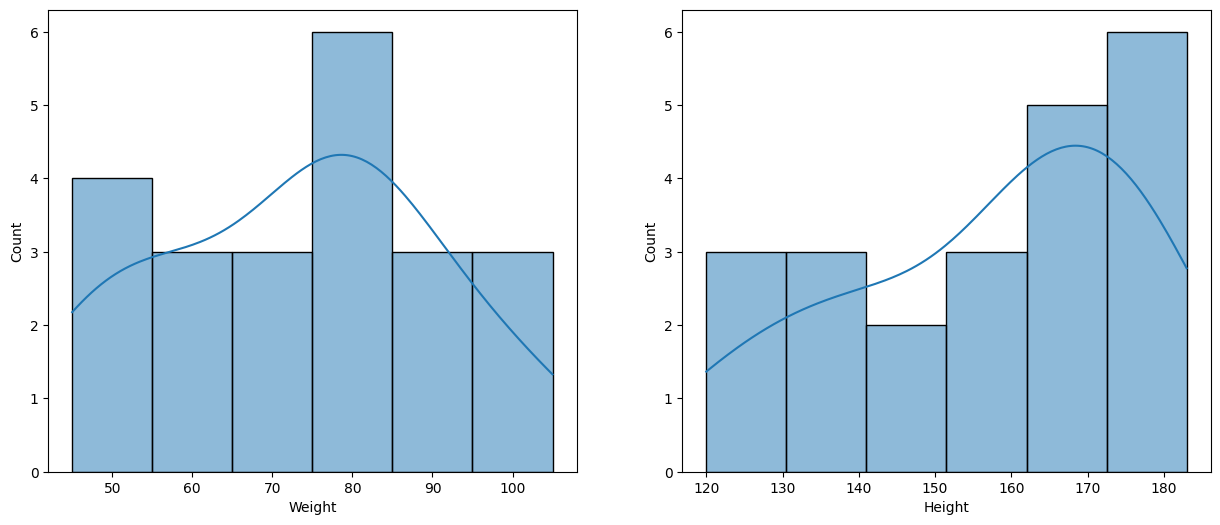

In [104]:
#plotting
fig,axis=plt.subplots(1,2,figsize=(15,6) )#row=1,column=2
plt.subplot(121)
sns.histplot(data['Weight'],kde=True)
plt.subplot(122)
sns.histplot(data['Height'],kde=True)


There is two histogram ,one is about weigth and second one is about heigth.
### Weight
1. The distribution seems to be slightly skewed to the right (a longer tail on the right side), meaning there are fewer occurrences of higher weights. 
2. The tallest bar is centered around 80, indicating that the most common weight in the dataset is around 80.

 
### Weight
1. The distribution has a slight skew to the left, indicating fewer occurrences of shorter heights.
2. The tallest bar is centered around 170-180, indicating that the most common height in the dataset is within this range.

In [105]:
x=data[['Weight']] #independent feature
y=data[['Height']] #dependent feature

In [106]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [107]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


Train and Split

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [109]:
x.shape

(22, 1)

In [110]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17, 1), (5, 1), (17, 1), (5, 1))

In [111]:
x_train.head()

,Weight
5,78
21,56
12,105
3,60
4,70


In [112]:
#standardization the dataset train independent data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [113]:
x_train

array([[ 0.20608301],
       [-1.17025708],
       [ 1.89522766],
       [-0.92001342],
       [-0.2944043 ],
       [ 0.08096118],
       [ 1.58242309],
       [ 0.76913122],
       [-0.60720886],
       [-1.67074438],
       [ 0.20608301],
       [-0.16928247],
       [ 0.95681396],
       [ 0.45632666],
       [ 0.20608301],
       [-1.85842712],
       [ 0.33120483]])

In [114]:
x_test

array([[-1.85842712],
       [ 0.6440094 ],
       [ 1.26961853],
       [-1.04513525],
       [-1.54562255]])

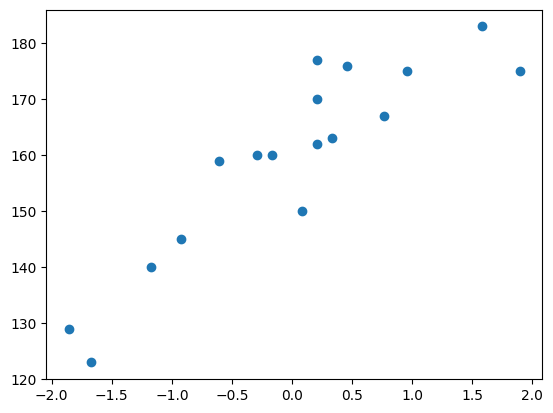

In [115]:
plt.scatter(x_train,y_train)

In [116]:
# train the simple linear regression model
regression=LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [117]:
print("The slope or coefficient of weight is:",regression.coef_)
print("The intercept of weight is:",regression.intercept_)

The slope or coefficient of weight is: [[15.01548499]]
The intercept of weight is: [159.64705882]


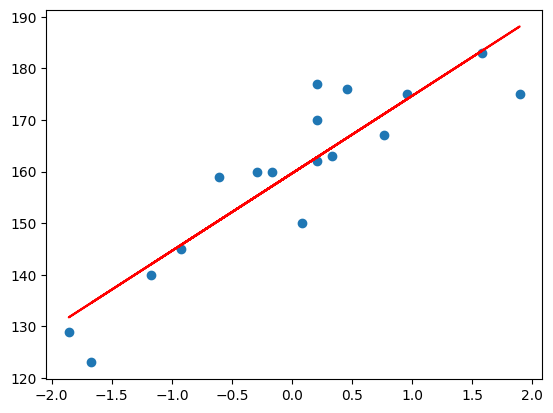

In [118]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),c='r')


## Prediction of train data
1. Predicted height output=intercept+coef_(weights)
2. y_height_train=159.64+15.01(x_train)

## Prediction of test data
1. Predicted height output=intercept+coe_(weights)
2. y_height_test=157.5+17.03(x_test)

In [119]:
y_height_test=regression.predict(x_test)

In [120]:
y_height_test,y_test

(array([[131.74187432],
        [169.31717226],
        [178.71099675],
        [143.95384615],
        [136.43878657]]),
     Height
 0      120
 14     170
 8      182
 1      135
 16     140)

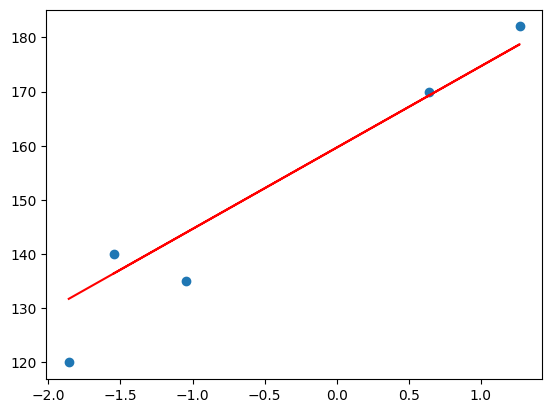

In [121]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regression.predict(x_test),c='r')

### Checking model accuracy
1. MSE
2. MAE
3. RMSE
4. R square and Adjusted R square

In [122]:
#checking accuracy
mse=mean_squared_error(y_test,y_height_test)
mae=mean_absolute_error(y_test,y_height_test)
rmse=np.sqrt(mse)


In [123]:
print("mean_squared_error:",mse)
print("mean_absolute_error:",mae)
print("rmse:",rmse)

mean_squared_error: 48.401802156635064
mean_absolute_error: 5.645752979414942
rmse: 6.957140372066318


In [124]:
score=r2_score(y_test,y_height_test)
score


0.9085792494774949

In [125]:
#display adjusted r square
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8781056659699932

#### New Data Point

In [126]:
#new data point weight is 

weight=int(input("the new data ponint weight is:"))
scaled_weight=scaler.transform([[80]])
print(regression.predict([scaled_weight[0]]))

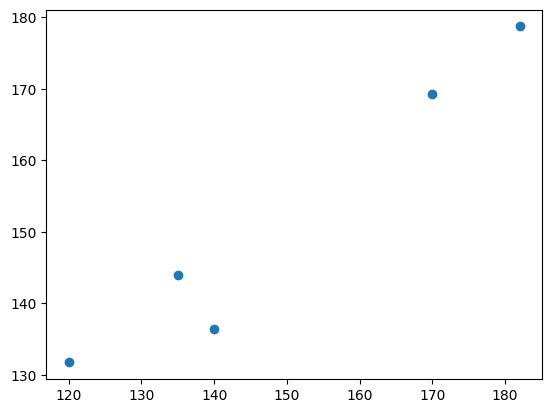

In [ ]:
#Assumptions 1
plt.scatter(y_test,y_height_test)

In [ ]:
#Assumptions 2
#Residuals
residual=y_test-y_height_test
residual

,Height
0,-11.741874
14,0.682828
8,3.289003
1,-8.953846
16,3.561213


<Axes: ylabel='Density'>

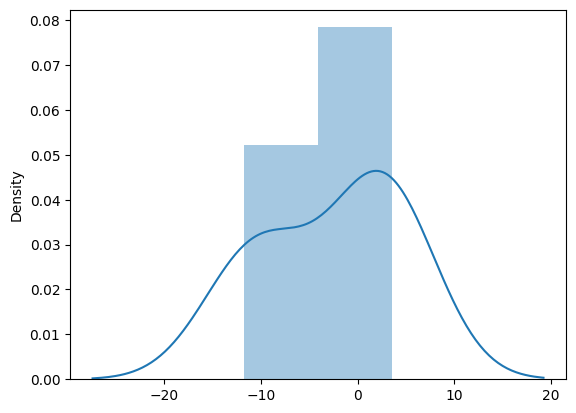

In [ ]:
sns.distplot(residual,kde='True')

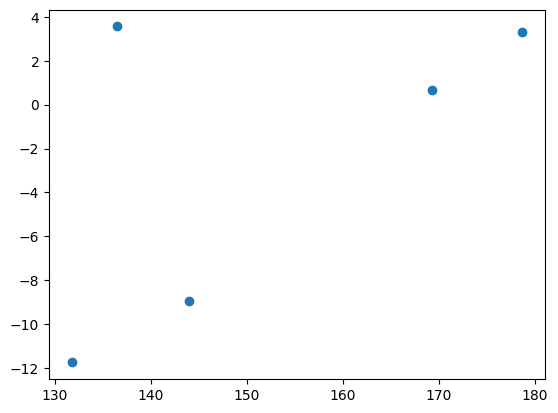

In [ ]:
#assumption 3
#scatter plot with respect to prediction and residuals
#uniform distribution
plt.scatter(y_height_test,residual)


### Assumption
1. predicted and actual value are linearly distributed consider that very good prediction.
2. Residual scatter plot should be normally distributed.
3. scatter plot with respect to prediction and residuals should be uniform distribution.